/Users/joelmiller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelmiller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelmiller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelmiller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

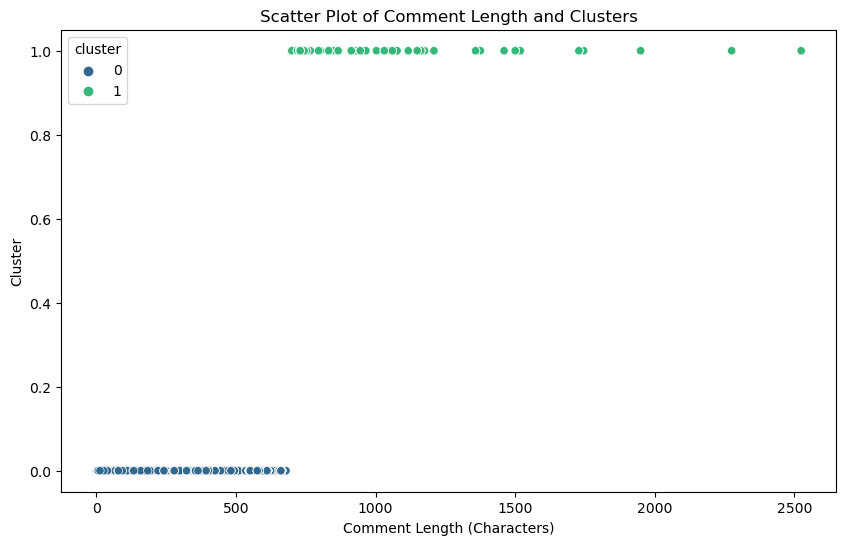

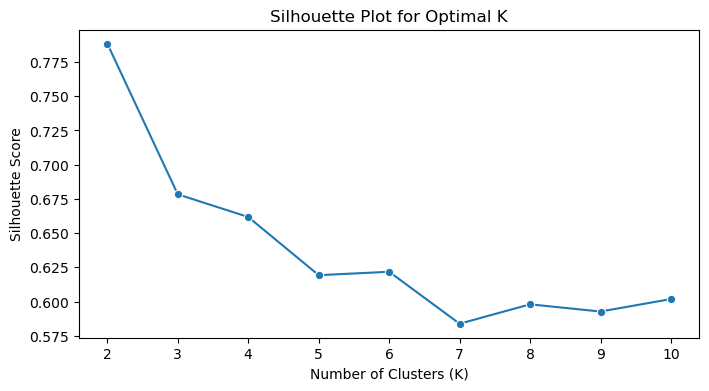

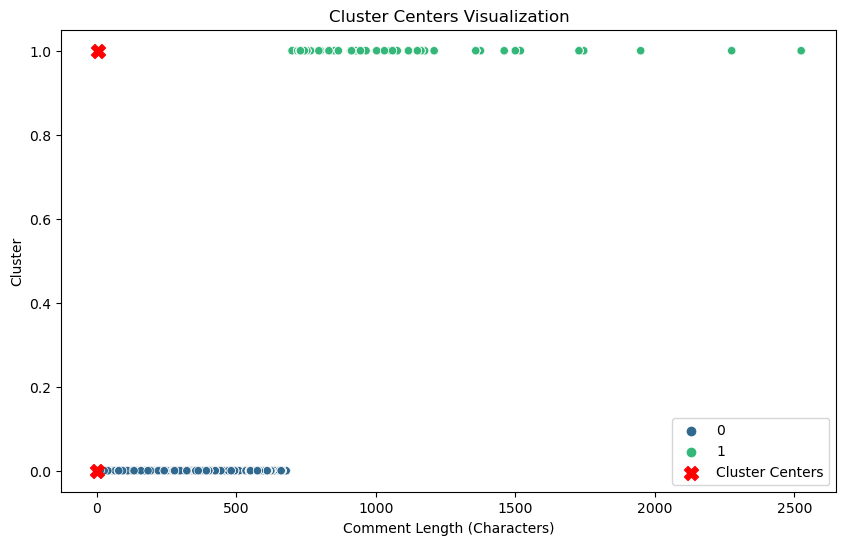

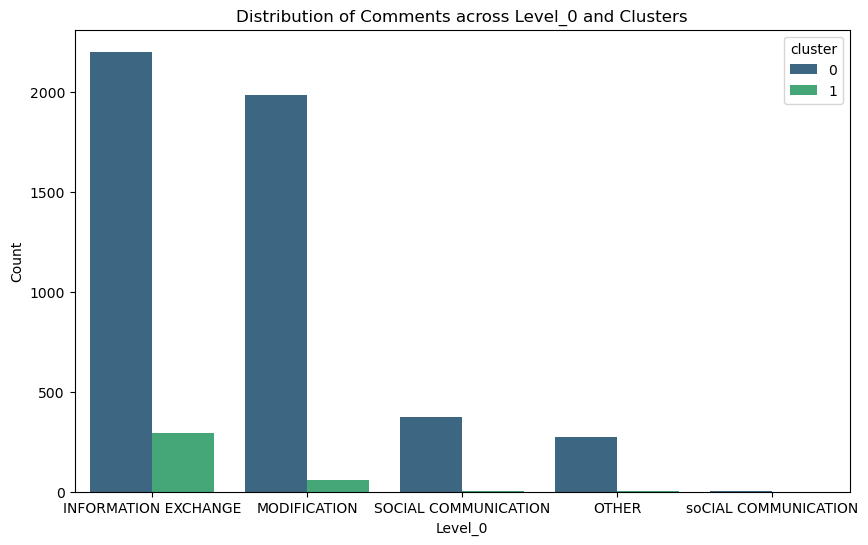

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load your dataset
# Replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('labeled_comments.csv')

# Data Preprocessing
# Calculate comment_length based on the length of 'comment_full_text'
df['comment_length'] = df['comment_full_text'].apply(lambda x: len(str(x)))

# Assuming 'comment_length' is in characters; you may adjust accordingly
X = df[['comment_length']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the optimal number of clusters (K)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

# Fit the K-Means model with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizations
# Scatter Plot for Comment Length and Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='cluster', data=df, hue='cluster', palette='viridis')
plt.title('Scatter Plot of Comment Length and Clusters')
plt.xlabel('Comment Length (Characters)')
plt.ylabel('Cluster')
plt.show()

# Silhouette Plot
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o')
plt.title('Silhouette Plot for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Cluster Centers Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='cluster', data=df, hue='cluster', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], range(optimal_k), c='red', marker='X', s=100, label='Cluster Centers')
plt.title('Cluster Centers Visualization')
plt.xlabel('Comment Length (Characters)')
plt.ylabel('Cluster')
plt.legend()
plt.show()

# Hierarchical Tree Diagram (you may use dendrogram)
# (Code depends on the hierarchical clustering method used)

# Bar Chart for Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='level_0', data=df, hue='cluster', palette='viridis')
plt.title('Distribution of Comments across Level_0 and Clusters')
plt.xlabel('Level_0')
plt.ylabel('Count')
plt.show()
